# Music Genre Classification and Song Reccomendation.
Using [gtzan](http://marsyas.info/index.html) dataset.
##  Exploring and Visualizing the Dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/gtzan-dataset-music-genre-classification/Data/genres_original'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00029.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00085.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00080.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00072.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00022.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00065.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00034.wav
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav
../input/gtzan-dataset-music-genre-classification/

Importing usual Libraries and audio oriented library [Librosa.](https://librosa.org/doc/latest/index.html)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
path = '../input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{path}/genres_original/')))

['hiphop', 'country', 'pop', 'reggae', 'jazz', 'blues', 'disco', 'rock', 'metal', 'classical']


### Exploring a single audio file:

In [33]:
random_audio_file=f'{general_path}/genres_original/reggae/reggae.00036.wav'
audio_file, sample_rate = librosa.load(random_audio_file)
print('Shape: ', len(audio_file))
print('Sample Rate: ', sample_rate,' kHz.')
print('Lenght of audio file: ', len(audio_file)/sample_rate,' seconds.')

Shape:  661794
Sample Rate:  22050  kHz.
Lenght of audio file:  30.013333333333332  seconds.


#### ***1. Sound Wave Visualization.***

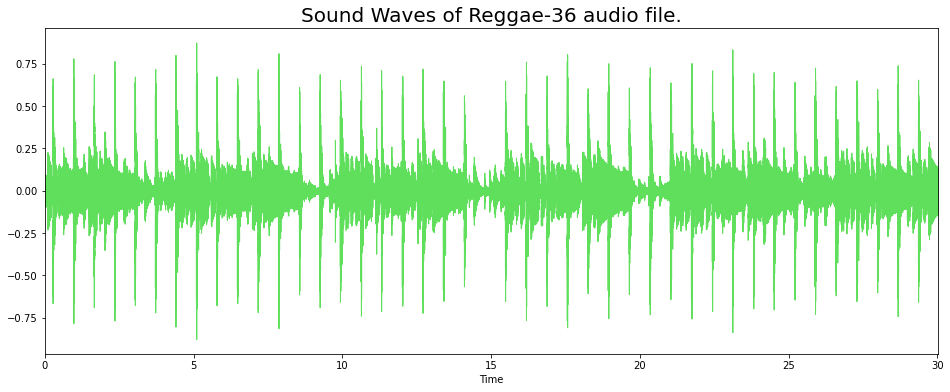

In [34]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sample_rate, color = "#5FDF5B");
plt.title("Sound Waves of Reggae-36 audio file.", fontsize = 20);


#### ***2. Spectogram.***

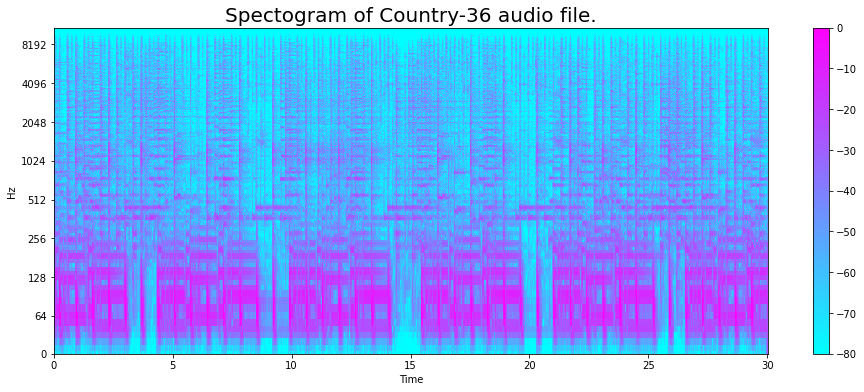

In [35]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sample_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.title('Spectogram of Reggae-36 audio file.', fontsize=20)
plt.colorbar();

#### ***3. Zero Crossing rate.***

In [36]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


#### ***4. Harmonics and Perceptrual.***

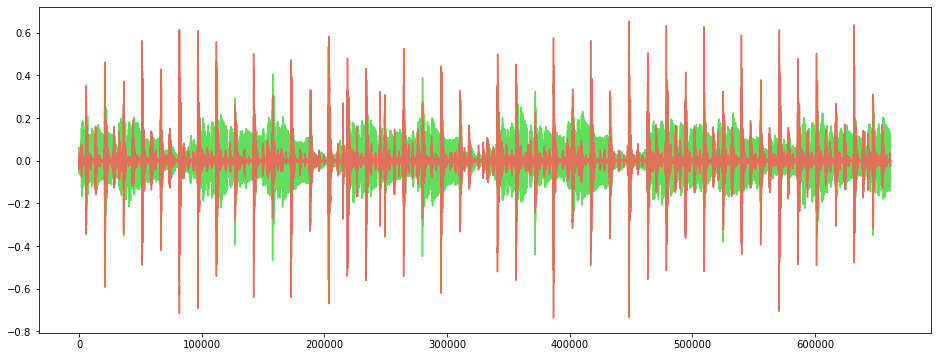

In [39]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#5FDF5B');
plt.plot(y_perc, color = '#DF715B');

#### ***5. Tempo or BPM.***

In [40]:
tempo, _ = librosa.beat.beat_track(audio_file, sr = sample_rate)
tempo

86.1328125

#### ***6. Spectral Centroid.***

In [42]:
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sample_rate)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1817.93364736 1953.08392985 2038.8113414  ...  766.50416352 1019.33192639
 1081.69931747] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


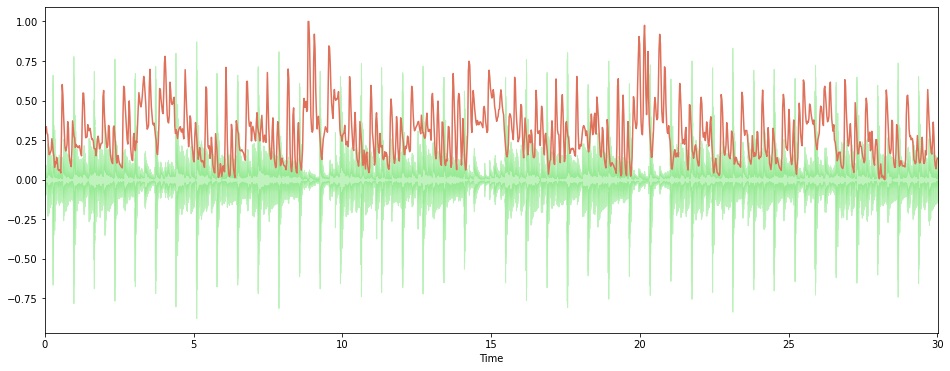

In [45]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sample_rate, alpha=0.4, color = '#5FDF5B');
plt.plot(t, normalize(spectral_centroids), color='#DF715B');

#### ***7. Spectral Rolloff.***

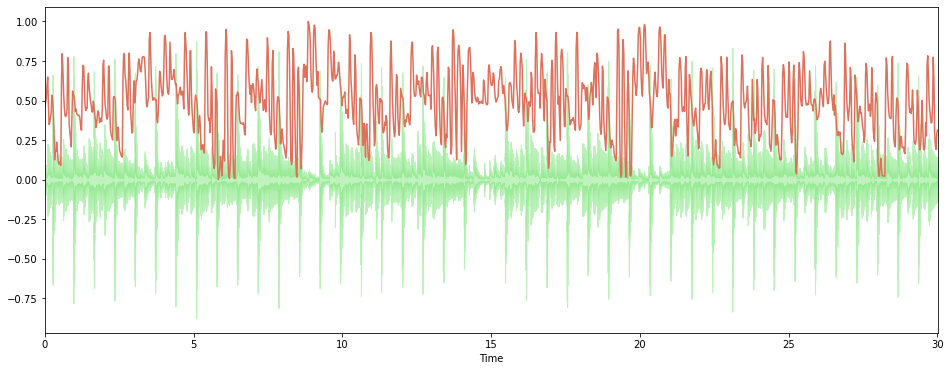

In [47]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sample_rate)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sample_rate, alpha=0.4, color = '#5FDF5B');
plt.plot(t, normalize(spectral_rolloff), color='#DF715B');

#### ***8. Mel-Frequency Cepstral Coefficients.***

mfccs shape: (20, 1293)


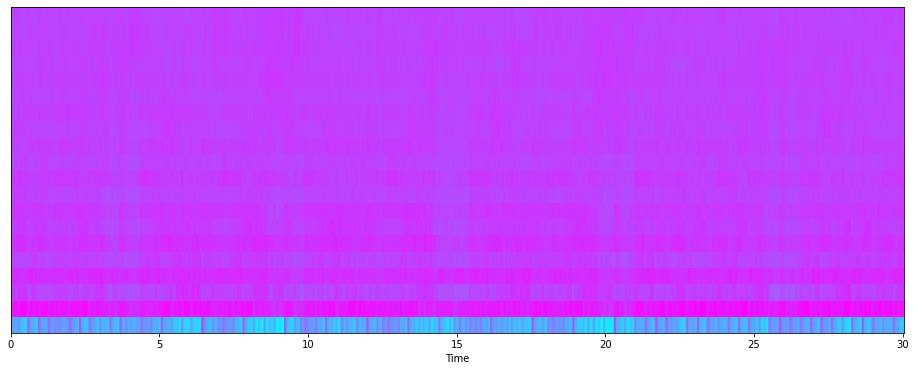

In [49]:
mfccs = librosa.feature.mfcc(audio_file, sr=sample_rate)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', cmap = 'cool');

#### ***9. Box Plot for Genre Distributions.***

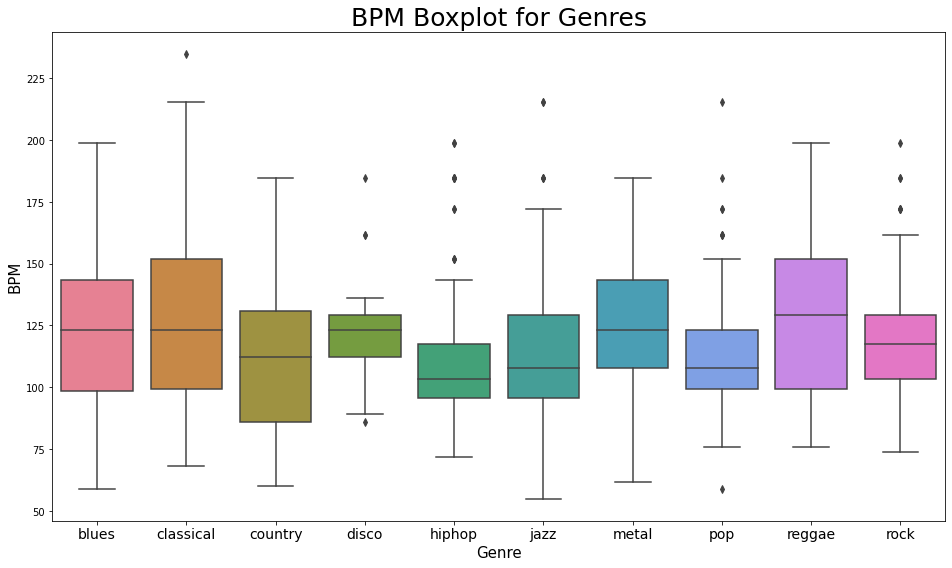

In [51]:
data = pd.read_csv(f'{path}/features_30_sec.csv')
data.head()
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")